## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [118]:
# Calcule a média de preço por marca e por veículo
df2 = df.copy()
# Realiza o agrupamento por 2 colunas, e só retorna a coluna price.
df2 = df2.groupby(['brand','vehicleType'])['price'].mean().reset_index()  
df2 = df2.rename(columns = {"price": "avgPrice"})
# Transforma a coluna avgPrice para int
df2['avgPrice'] = df2['avgPrice'].astype(int)
# Reordena a ordem de exibição
df2[['avgPrice','brand','vehicleType']].head(5)

,avgPrice,brand,vehicleType
0,669,alfa_romeo,Other
1,962,alfa_romeo,andere
2,7035,alfa_romeo,cabrio
3,5265,alfa_romeo,coupe
4,1867,alfa_romeo,kleinwagen


## Preço médio de um veículo por marca, bem como tipo de veículo

Text(0.5, 1.0, 'Preço médio de um veículo por marca e tipo de veículo')

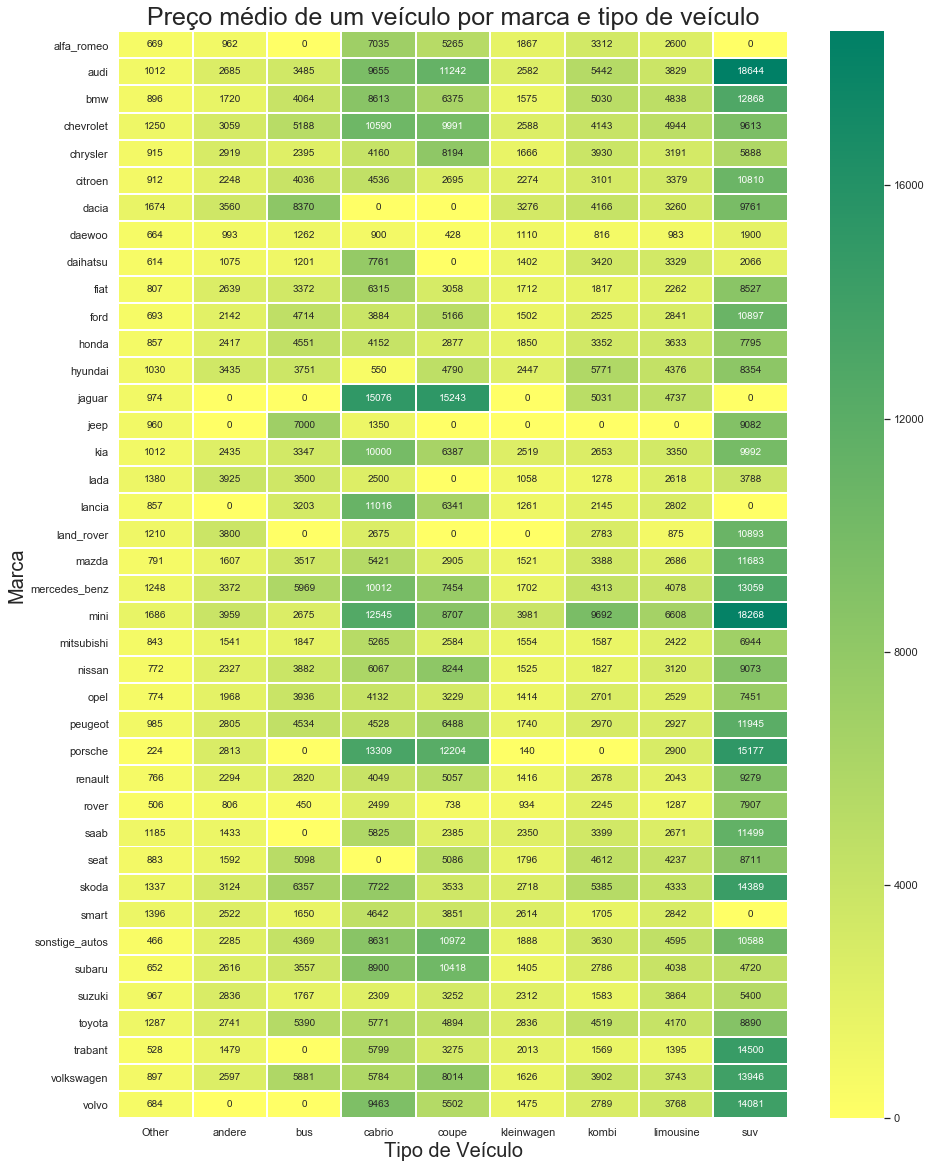

In [117]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo

# Cria um pivot onde: brand será o eixo y, vehicleType o eixo x e avgPrice será preenchido no pivot.
df2_pivot = df2.pivot(index='brand',columns='vehicleType',values='avgPrice').fillna(0) # preenche os valores NaN com 0.
df2_pivot = df2_pivot.astype(int) # Transforma todas colunas numéricas geradas em int.

fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(df2_pivot,annot=True, fmt='d',linewidths=1, cmap='summer_r')
ax.set_xlabel('Tipo de Veículo', fontsize= 20)
ax.set_ylabel('Marca', fontsize= 20)
ax.set_title('Preço médio de um veículo por marca e tipo de veículo', fontsize= 25)

In [119]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")